# Imports

In [1]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;

In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

In [3]:
import scipy as sp

# (1) define equation

In [4]:
t = np.linspace(0,10,100)

In [5]:
def integrand(n_out, t, t0=0, x=1, a=1, b=0, Lambda=1, n_0=1):
    elt   = np.exp(- Lambda * (t-t0))
    
    n_tot     = x * n_0 * (1 - elt)
    n_tot_dot = Lambda * x * n_0 * elt
    n_in      = n_tot - n_out
    
    f_out = 0
    if n_in/n_0 < 0.3:
        f_out = 0
    elif n_in/n_0 < 0.6:
        f_out = a*(n_in/n_0) + b
    else:
        f_out = 1
        
    return (n_tot_dot * f_out)
    # return (Lambda*x*n_0*elt*( a*x*(1-elt) + b - a*n_out/n_0 ) )

In [9]:
Lambda = 0.055 
n_0 = 1

t0 = 0
x = 1.8
# a = 6.5
n_out = dict()
for a,b in zip([6.2,6.7],[-1.9,-1.8]):
    n_out['a=',a,',b=',b] = sp.integrate.odeint(integrand, 0, t, (t0, x, a, b, Lambda, n_0))

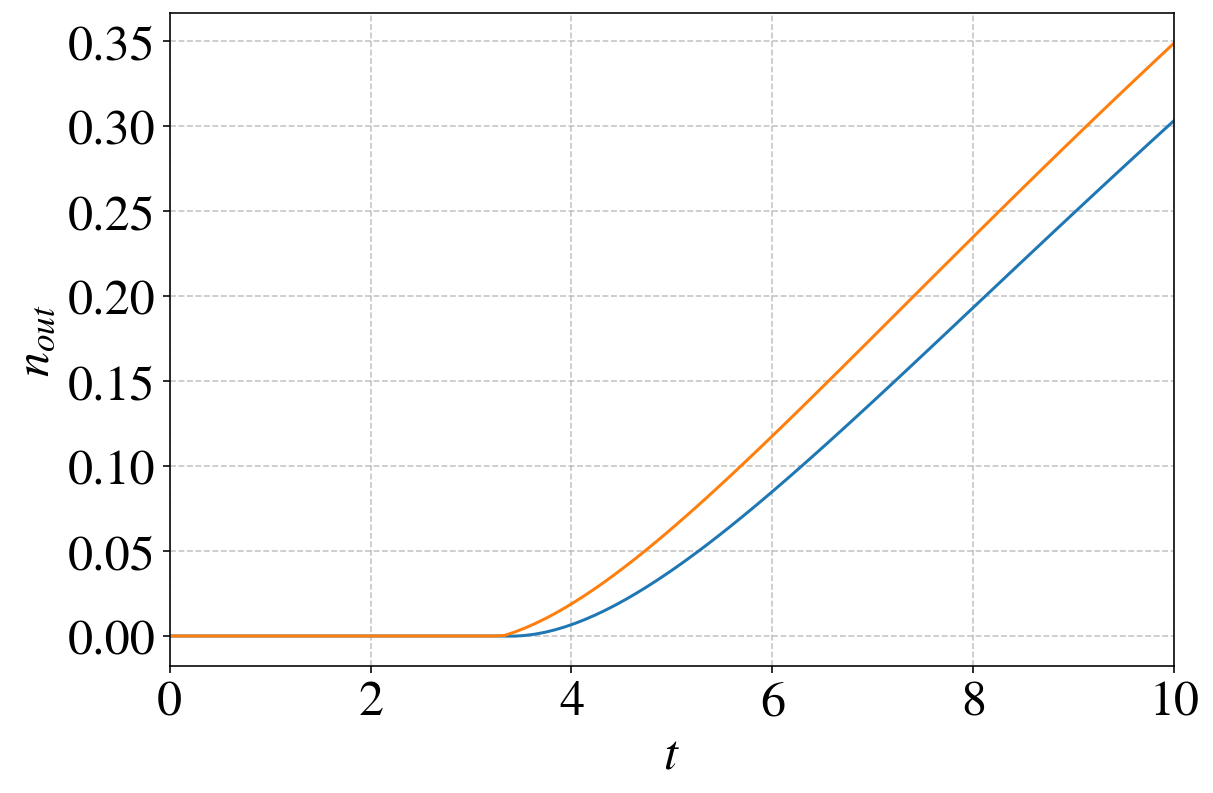

In [10]:
fig = plt.figure(figsize=(9,6));
ax = fig.add_subplot(1,1,1)
for a,b in zip([6.2,6.7],[-1.9,-1.8]):
    ax.plot(t,n_out['a=',a,',b=',b]);
set_axes(ax,'$t$ ','$n_{out}$',do_add_grid=True,xlim=(0,10));

In [ ]:
fig = plt.figure(figsize=(9,6));
ax = fig.add_subplot(1,1,1)
ax.plot(t,n_out);
set_axes(ax,'t ','$n_{out}$',do_add_grid=True);